# ML Zoomcamp homework 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv', header=0)
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

<AxesSubplot:ylabel='Frequency'>

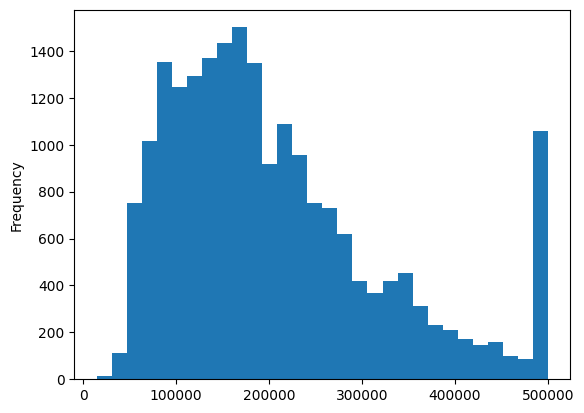

In [3]:
data.median_house_value.plot.hist(bins=30)

## Question 1

In [4]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Question 2

In [95]:
data.population.median()

1166.0

In [76]:
feats = pd.Index([    
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income'
])
target = data.median_house_value

In [77]:
np.random.seed(42)

In [78]:
n_val = int(data.shape[0] * 0.2)
n_test = int(data.shape[0] * 0.2)
n_train = int(data.shape[0] - (n_val + n_test))
n_train, n_val, n_test

(12384, 4128, 4128)

In [79]:
idx = data.index.values
np.random.shuffle(idx)
idx

array([ 7211, 14758, 14890, ...,  8689, 12688, 12077])

In [80]:
df_train = data.loc[idx[:n_train], feats]
df_test = data.loc[idx[n_train:(n_train + n_test)], feats]
df_val = data.loc[idx[(n_train + n_test):], feats]
X_train = df_train.values
X_test = df_test.values
X_val = df_val.values
y = np.log1p(target)
y_train = y[idx[:n_train]]
y_test = y[idx[n_train:(n_train + n_test)]]
y_val = y[idx[(n_train + n_test):]]

In [81]:
y_train

16363    11.695255
9359     11.844392
4982     11.635152
6816     12.349744
2092     11.390769
           ...    
14354    11.730461
18031    13.003807
7532     11.461643
5237     12.245779
9602     11.218568
Name: median_house_value, Length: 12384, dtype: float64

In [82]:
def get_weights(X, y):
    # The weights should have the same length as features
    X = np.column_stack([np.ones(X.shape[0]), X])
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [83]:
def rmse(y_pred, y):
    
    return np.sqrt(((y_pred - y) ** 2).mean())

In [84]:
def lin_reg(X, w):
    
    X = np.column_stack([np.ones(X.shape[0]), X])
    
    return X.dot(w)

## Question 3

In [86]:
X_train_zero = df_train.fillna(0).values
X_train_mean = df_train.fillna(target.mean()).values
w_zero = get_weights(X_train_zero, y_train)
w_mean = get_weights(X_train_mean, y_train)

In [87]:
y_pred_zero = lin_reg(X_train_zero, w_zero)
y_pred_mean = lin_reg(X_train_mean, w_mean)
print('RMSE zero-filled:', round(rmse(y_pred_zero, y_train), 4))
print('RMSE mean-filled:', round(rmse(y_pred_mean, y_train), 4))

RMSE zero-filled: 0.3429
RMSE mean-filled: 0.3436


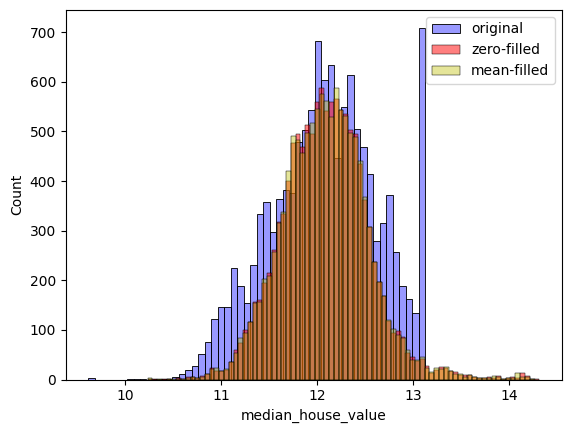

In [88]:
sns.histplot(y_train, color='b', alpha=0.4, label='original')
sns.histplot(y_pred_zero, color='r', alpha=0.5, label='zero-filled')
sns.histplot(y_pred_mean, color='y', alpha=0.4, label='mean-filled')
plt.legend()

In [89]:
def get_reg_weights(X, y, r):
    # The weights should have the same length as features
    X = np.column_stack([np.ones(X.shape[0]), X])
    XTX = X.T.dot(X)
    XTX = XTX + np.eye(XTX.shape[0]) * r
    
    return np.linalg.inv(XTX).dot(X.T).dot(y)

## Question 4

In [90]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w = get_reg_weights(X_train_zero, y_train, r)
    y_pred = lin_reg(X_train_zero, w)
    print(f'RMSE r({r}) =', round(rmse(y_pred, y_train), 4))

RMSE r(0) = 0.3429
RMSE r(1e-06) = 0.3429
RMSE r(0.0001) = 0.3429
RMSE r(0.001) = 0.3429
RMSE r(0.01) = 0.3429
RMSE r(0.1) = 0.343
RMSE r(1) = 0.3464
RMSE r(5) = 0.351
RMSE r(10) = 0.3522


## Question 5

In [91]:
errors = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(s)
    idx = data.index.values
    np.random.shuffle(idx)
    df = data.fillna(0)
    df_train = df.loc[idx[:n_train], feats]
    df_test = df.loc[idx[n_train:(n_train + n_test)], feats]
    df_val = df.loc[idx[(n_train + n_test):], feats]
    X_train = df_train.values
    X_test = df_test.values
    X_val = df_val.values
    y = np.log1p(target)
    y_train = y[idx[:n_train]]
    y_test = y[idx[n_train:(n_train + n_test)]]
    y_val = y[idx[(n_train + n_test):]]
    w = get_weights(X_train, y_train)
    y_pred = lin_reg(X_val, w)
    err = rmse(y_pred, y_val)
    errors.append(err)
    print(f'RMSE seed {s} =', round(err, 4))
print('SD of errors =', round(np.std(errors), 3))

RMSE seed 0 = 0.3289
RMSE seed 1 = 0.3431
RMSE seed 2 = 0.3517
RMSE seed 3 = 0.3316
RMSE seed 4 = 0.3533
RMSE seed 5 = 0.3447
RMSE seed 6 = 0.3435
RMSE seed 7 = 0.339
RMSE seed 8 = 0.3397
RMSE seed 9 = 0.3305
SD of errors = 0.008


## Question 6

In [ ]:
np.random.seed(9)
idx = data.index.values
np.random.shuffle(idx)
df = data.fillna(0)
df_train = df.loc[idx[:n_train + n_val], feats]
df_test = df.loc[idx[n_train + n_test:], feats]
#df_val = df.loc[idx[(n_train + n_test):], feats]
X_train = df_train.values
X_test = df_test.values
#X_val = df_val.values
y = np.log1p(target)
y_train = y[idx[:n_train + n_val]]
y_test = y[idx[n_train + n_val:]]
#y_val = y[idx[(n_train + n_test):]]
w = get_reg_weights(X_train, y_train, 0.001)
y_pred = lin_reg(X_test, w)
err = rmse(y_pred, y_test)
print(f'RMSE =', round(err, 4))

RMSE = 0.3473
